<a href="https://colab.research.google.com/github/MinhFus/MachineLearning/blob/main/Lab_4_20130365_DoMinhPhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [42]:
# code
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import datasets
from warnings import simplefilter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/NLU/Machine Learning/BaiTap'

Mounted at /content/gdrive
/content/gdrive/MyDrive/NLU/Machine Learning/BaiTap


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [ ]:
# code
from sklearn import datasets
data4 = datasets.load_iris()
x = data4['data']
y = data4['target']
# print(x)
# print(y)
classifier = LogisticRegression(random_state = 0) 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3,random_state=None, shuffle=True, stratify=None)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred) 
print(cm)
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

[[16  0  0]
 [ 0 15  2]
 [ 0  0 12]]
Accuracy :  0.9555555555555556


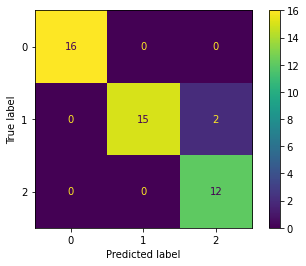

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [ ]:
mnist = datasets.load_digits()
x1 = mnist['data']
y1 = mnist['target']
classifier1 = LogisticRegression(random_state = 0) 
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1,y1, test_size = 0.3,random_state=None, shuffle=True, stratify=None)
classifier1.fit(X1_train, Y1_train) 
y1_pred = classifier1.predict(X1_test)
cm1 = confusion_matrix(Y1_test, y1_pred) 
print(cm1)

[[51  0  0  0  1  1  0  0  0  0]
 [ 0 57  1  0  0  0  0  0  1  1]
 [ 0  1 57  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  1  0]
 [ 1  1  0  0 49  0  1  1  0  0]
 [ 0  0  0  3  0 43  0  0  0  0]
 [ 0  1  0  0  0  0 62  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  2  0  0  0  1  0  0 51  0]
 [ 0  1  0  0  0  0  0  0  2 45]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


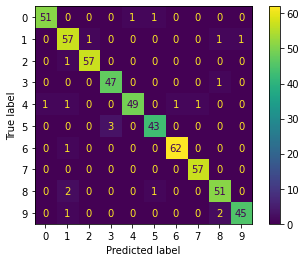

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y1_test,y1_pred)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


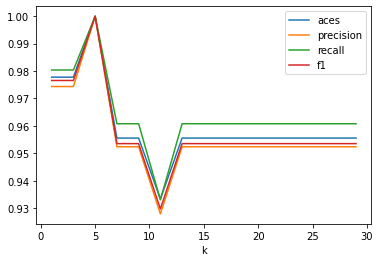

In [ ]:
# code
k_range = range(1,30,2)
aces =[]
precision =[]
recall = []
f1 = []
for k in k_range:
  kNN = KNeighborsClassifier(n_neighbors = k)
  kNN.fit(X_train,Y_train)
  y_pred = kNN.predict(X_test)

  aces.append(metrics.accuracy_score(Y_test, y_pred))
  precision.append(metrics.precision_score(Y_test, y_pred, average='macro'))
  recall.append(metrics.recall_score(Y_test, y_pred, average='macro'))
  f1.append(metrics.f1_score(Y_test, y_pred, average='macro'))

plt.plot(k_range,aces,label='aces')
plt.plot(k_range,precision,label='precision')
plt.plot(k_range,recall,label='recall')
plt.plot(k_range,f1,label='f1')
plt.xlabel("k") 
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


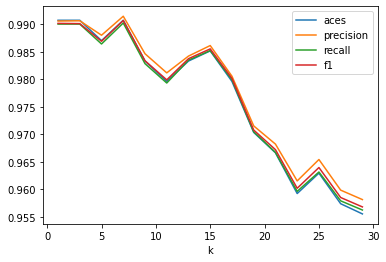

In [ ]:
# code
k1_range = range(1,30,2)
aces =[]
precision =[]
recall = []
f1 = []
for k in k1_range:
  kNN = KNeighborsClassifier(n_neighbors = k)
  kNN.fit(X1_train,Y1_train)
  y1_pred = kNN.predict(X1_test)

  aces.append(metrics.accuracy_score(Y1_test, y1_pred))
  precision.append(metrics.precision_score(Y1_test, y1_pred, average='macro'))
  recall.append(metrics.recall_score(Y1_test, y1_pred, average='macro'))
  f1.append(metrics.f1_score(Y1_test, y1_pred, average='macro'))

plt.plot(k1_range,aces,label='aces')
plt.plot(k1_range,precision,label='precision')
plt.plot(k1_range,recall,label='recall')
plt.plot(k1_range,f1,label='f1')
plt.xlabel("k") 
plt.legend()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [96]:
# code
df = pd.read_csv('spambase.csv')
x5 = df.iloc[:,:-1]
y5 = df[[ 'class']]
X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5, y5, test_size = 0.3, train_size= 0.7,random_state = None,shuffle=True, stratify=None)

aces =[]
precision =[]
recall = []
f1 = []

In [97]:
# Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_model.fit(X5_train,Y5_train)
y_pred_DT = clf_model.predict(X5_test)

aces_DT = metrics.accuracy_score(Y5_test, y_pred_DT)
precision_DT = metrics.precision_score(Y5_test, y_pred_DT, average='macro')
recall_DT = metrics.recall_score(Y5_test, y_pred_DT, average='macro')
f1_DT = metrics.f1_score(Y5_test, y_pred_DT, average='macro')

aces.append(aces_DT)
precision.append(precision_DT)
recall.append(recall_DT)
f1.append(f1_DT)

In [98]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X5_train, Y5_train)
y_pred_LR = classifier.predict(X5_test)

aces_LR = metrics.accuracy_score(Y5_test, y_pred_LR)
precision_LR = metrics.precision_score(Y5_test, y_pred_LR, average='macro')
recall_LR = metrics.recall_score(Y5_test, y_pred_LR, average='macro')
f1_LR = metrics.f1_score(Y5_test, y_pred_LR, average='macro')

aces.append(aces_LR)
precision.append(precision_LR)
recall.append(recall_LR)
f1.append(f1_LR)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# kNN
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X5_train,Y5_train)
y_pred_kNN = kNN.predict(X5_test)

aces_kNN = metrics.accuracy_score(Y5_test, y_pred_kNN)
precision_kNN = metrics.precision_score(Y5_test, y_pred_kNN, average='macro')
recall_kNN = metrics.recall_score(Y5_test, y_pred_kNN, average='macro')
f1_kNN = metrics.f1_score(Y5_test, y_pred_kNN, average='macro')

aces.append(aces_kNN)
precision.append(precision_kNN)
recall.append(recall_kNN)
f1.append(f1_kNN)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<function matplotlib.pyplot.show(close=None, block=None)>

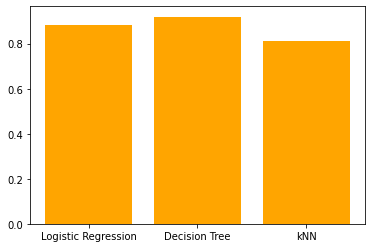

In [102]:
# Aces
name = ['Logistic Regression','Decision Tree','kNN']
plt.bar(name,aces,color='orange')
plt.show

#Finally,
Save a copy in your Github. Remember renaming the notebook.